In [5]:
!pip install -q sklearn

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
from statsmodels.stats.power import tt_ind_solve_power


from sklearn.metrics import mean_absolute_error
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
%tensorflow_version 2.x 

UsageError: Line magic function `%tensorflow_version` not found.


In [8]:
# Load dataset.
dftrain = pd.read_csv('C:/Users/doryn/OneDrive/Desktop/ticdata2000 - Copy.csv', sep = '\t') # training data
dfeval = pd.read_csv('C:/Users/doryn/OneDrive/Desktop/ticeval2000(3).csv', sep = '\t') # testing data
y_train = dftrain.pop('#mohome')
y_eval = dfeval.pop('#mohome')

In [41]:
#power
tt_ind_solve_power(effect_size=0.09, nobs1 = 40, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.0682949855404854

In [39]:
#correlation
import scipy.stats

print("married")
print(scipy.stats.pearsonr(dftrain['married'], y_train))
print("aveinc")
print(scipy.stats.pearsonr(dftrain['aveinc'], y_train))
print("lowedu")
print(scipy.stats.pearsonr(dftrain['lowedu'], y_train))

married
(0.07026382787804947, 8.016574736457406e-08)
aveinc
(0.0901853819579985, 5.428258615398742e-12)
lowedu
(-0.09056133044126728, 4.429339560994912e-12)


In [11]:
dftrain.head()

,custype,#ofhome,avgfam,avgage,cusmtyp,catholi,protest,otherel,norel,married,...,#life,#pri.1,#prif,#dis,#fire,#surf,#boat,#bike,#prop,#ss
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [12]:
dftrain.describe()

,custype,#ofhome,avgfam,avgage,cusmtyp,catholi,protest,otherel,norel,married,...,#life,#pri.1,#prif,#dis,#fire,#surf,#boat,#bike,#prop,#ss
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [13]:
dftrain.shape

(5822, 85)

In [14]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: #mohome, dtype: int64

<AxesSubplot:>

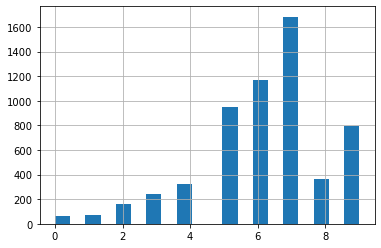

In [15]:
dftrain.married.hist(bins=20)

<AxesSubplot:>

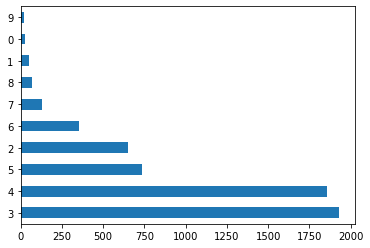

In [16]:
dftrain.aveinc.value_counts().plot(kind='barh')

<AxesSubplot:>

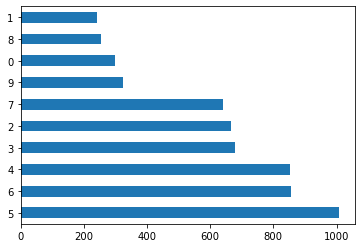

In [17]:
dftrain['lowedu'].value_counts().plot(kind='barh')

Text(0.5, 0, '% #mohome')

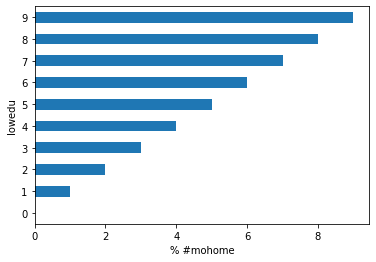

In [18]:
pd.concat([dftrain, y_train], axis=1).groupby('lowedu').lowedu.mean().plot(kind='barh').set_xlabel('% #mohome')

In [19]:
#making the regressor
CATEGORICAL_COLUMNS = ['avgfam']
NUMERIC_COLUMNS = ['lowedu', 'married', 'aveinc']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='avgfam', vocabulary_list=(3, 2, 4, 1, 5), dtype=tf.int64, default_value=-1, num_oov_buckets=0), NumericColumn(key='lowedu', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='married', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='aveinc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [20]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [23]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\doryn\\AppData\\Local\\Temp\\tmp2q84cfwk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result)  # the result variable is simply a dict of stats about our model

{'average_loss': nan, 'label/mean': nan, 'loss': nan, 'prediction/mean': 0.0912587, 'global_step': 3640}


In [26]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\doryn\AppData\Local\Temp\tmp2q84cfwk\model.ckpt-3640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyError: 'probabilities'

In [27]:
#randomforestregressor
model = RandomForestRegressor()
model.fit(dftrain, y_train)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(dftrain)
MAE = mean_absolute_error(y_train , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.04590412256738262


In [28]:
#booster regressor
XGBModel = XGBRegressor()
XGBModel.fit(dftrain, y_train, verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(dftrain)
MAE = mean_absolute_error(y_train , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

ValueError: feature_names must be string, and may not contain [, ] or <

In [29]:
#gridsearch optimizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(dftrain, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\doryn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doryn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doryn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doryn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

KeyboardInterrupt: 

In [30]:
#lasso regressor
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(dftrain, y_train)
print(clf.coef_)
print(clf.intercept_)

[-0.00067352 -0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.          0.00050019 -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
0.07462262592898238
